<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#일표본-t-test" data-toc-modified-id="일표본-t-test-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>일표본 t-test</a></span></li><li><span><a href="#대응표본-t-test" data-toc-modified-id="대응표본-t-test-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>대응표본 t-test</a></span></li><li><span><a href="#독립표본-t-test" data-toc-modified-id="독립표본-t-test-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>독립표본 t-test</a></span></li></ul></div>

# 일표본 t-test

 cats 데이터에서 고양이들의 평균몸무게가 2.6kg인지 아닌지 통계적 검정을 수행하고, 결과를 해석해보자(양측검정, 유의수준 : 0.05).

In [1]:
import pandas as pd
cats=pd.read_csv('../data/cats.csv')
cats


,Sex,Bwt,Hwt
0,F,2.0,7.0
1,F,2.0,7.4
2,F,2.0,9.5
3,F,2.1,7.2
4,F,2.1,7.3
...,...,...,...
139,M,3.7,11.0
140,M,3.8,14.8
141,M,3.8,16.8
142,M,3.9,14.4


Bwt 컬럼은 고양이의 몸무게를 의미하고, Hwt는 고양이의 길이를 의미한다. 
cats의 데이터의 정보를 info로 확인해준다. 

In [2]:
cats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sex     144 non-null    object 
 1   Bwt     144 non-null    float64
 2   Hwt     144 non-null    float64
dtypes: float64(2), object(1)
memory usage: 3.5+ KB


shapiro test를 통해 데이터의 정규성을 검정한다. 고양이의 몸무게를 검정하므로 고양이의 몸무게만 추출하여 shapiro test를 진행해야 한다. 

In [3]:
import scipy.stats as stats
from scipy.stats import shapiro
mu =2.6
shapiro(cats['Bwt'])


ShapiroResult(statistic=0.9518786668777466, pvalue=6.730248423991725e-05)

[결과해석]
첫번째 값 (검정통계치) : 0.95187
두번째 값 (p-value) : 6.730e-05
유의수준보다 작으므로 '데이터가 정규분포를 따른다'는 귀무가설을 기각한다. 즉, cats 데이이터의 Bwt 변수는 정규분포를 따르지 않는다. 데이터가 정규분포를 따르지 않으므로 wilcox test 로 t-test를 진행한다. 만약, 정규분포를 따른다면 stats.ttest_1samp(cats.Bwt, popmean=mu)를 사용하면 된다. 

In [4]:
stats.wilcoxon(cats.Bwt - mu , alternative='two-sided')

WilcoxonResult(statistic=3573.0, pvalue=0.02524520294814093)

Text(0, 0.5, 'Count')

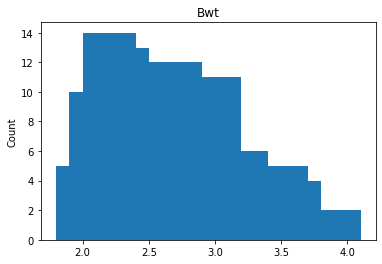

In [5]:
import matplotlib.pyplot as plt
cats_Bwt_cnt = pd.value_counts(cats['Bwt'].values, sort=False)
width =0.4
plt.bar(cats_Bwt_cnt.index, cats_Bwt_cnt.values,width)
plt.title('Bwt')
plt.ylabel('Count')


# 대응표본 t-test

10명의 환자 대상 수면영양제 복용 전과 후의 수면시간을 측정하였다.  
영양제의 효과가 있는지를 판단해보자. 

In [6]:
# 데이터 불러오기 및 확인 
import pandas as pd 
data = {'before':[7,3,4,5,2,1,6,6,5,4],
       'after':[8,4,5,6,2,3,6,8,6,5]}
data = pd.DataFrame(data)
data


,before,after
0,7,8
1,3,4
2,4,5
3,5,6
4,2,2
5,1,3
6,6,6
7,6,8
8,5,6
9,4,5


해당 데이터를 검정하기 위한 가설 수립한다.  <br> <br>
귀무가설(H0) <br>
수면제 복용 전과 후의 수면시간 차이는 없다. <br>
대립가설(H1)<br>
수면제 복용 전과 후의 수면시간 차이는 있다. <br>


In [7]:
stats.ttest_rel(data['after'],data['before'],alternative='greater')

Ttest_relResult(statistic=4.743416490252569, pvalue=0.0005269356285082765)

In [8]:
data.mean()

before    4.3
after     5.3
dtype: float64

[결과해석]
p-value가 유의수준보다 작으므로 '수면영양제를 복용하기 전과 후의 평균 수면시간의 차이는 통계적으로 유의하며, 영양제를 복용한 후 수면시간이 늘었다'는 결론을 낼 수 있다. 

# 독립표본 t-test

In [9]:
import pandas as pd
cats=pd.read_csv('../data/cats.csv')

female = cats.loc[cats.Sex =='F', 'Bwt']
male = cats.loc[cats.Sex =='M', 'Bwt']
stats.levene(female, male)


LeveneResult(statistic=19.43101190877999, pvalue=2.0435285255189404e-05)

In [10]:
stats.ttest_ind(female, male, equal_var=False)

Ttest_indResult(statistic=-8.70948849909559, pvalue=8.831034455859356e-15)

In [11]:
print(female.mean())
print(male.mean())


2.359574468085107
2.8999999999999995


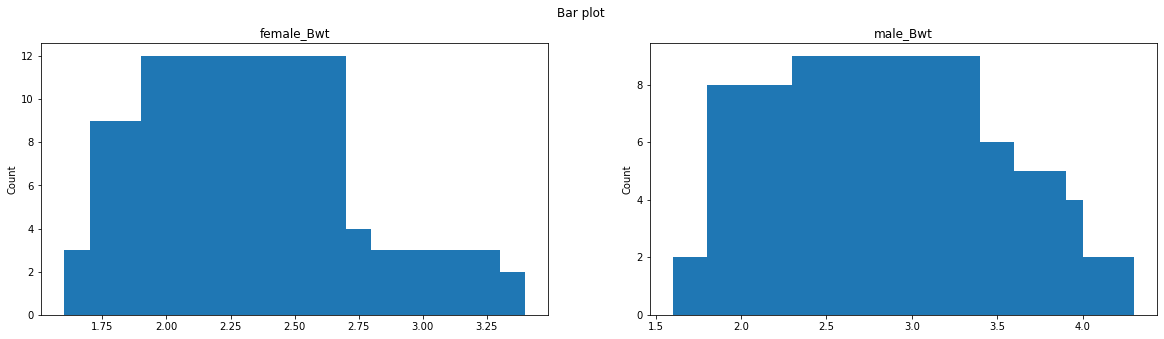

In [12]:
female_Bwt_cnt = pd.value_counts(female.values, sort=False)
male_Bwt_cnt = pd.value_counts(male.values, sort=False)
fig, axs = plt.subplots(1, 2,figsize=(20,5))
fig.suptitle('Bar plot')
width =0.4
axs[0].bar(female_Bwt_cnt.index, female_Bwt_cnt.values)
axs[0].set_title('female_Bwt')
axs[0].set_ylabel('Count')
axs[1].bar(male_Bwt_cnt.index, male_Bwt_cnt.values)
axs[1].set_title('male_Bwt')
axs[1].set_ylabel('Count')
plt.show()
